# <div style = 'background-color:skyblue'> <center> 4th_Mini_Project_Time_Series </div>

# Problem Statement 

__Every business owner’s objective is to estimate the future trends – in terms of sales, profits, gains etc. To do this analysis, the owner first has to segregate the data by category and analyze each entity separately. For each entity, a forecast can be estimated based on the past sales of that entity. The idea behind this is to find out the popularity of a certain product and how its sales can impact the business.__

__Every product category is unique and cater to different customer base. So the analysis cannot be generalized that one trend is applicable to all products. A thorough insight into the past performance will reveal a lot of components that will enable the business to identify the trends.__

In [1]:
import numpy as np                                     # Used for Mathematical calculations
import pandas as pd                                    # Used for dealing with DataFrame 
import matplotlib.pyplot as plt                        # Used for data Visualization
import seaborn as sb                                   # Used for Advanced Data Visualization
from tabulate import tabulate                          # Used for create tables 
import warnings                                        # Used for ignore Warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error         # Used for Calculate Mean Squared Error
                                                   
from sklearn import preprocessing                      # Used for preprocessing     
from matplotlib import style
plt.style.use('fivethirtyeight')

## Load the dataset into a pandas dataframe

In [2]:
df=pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls",parse_dates=True)        # Reading the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


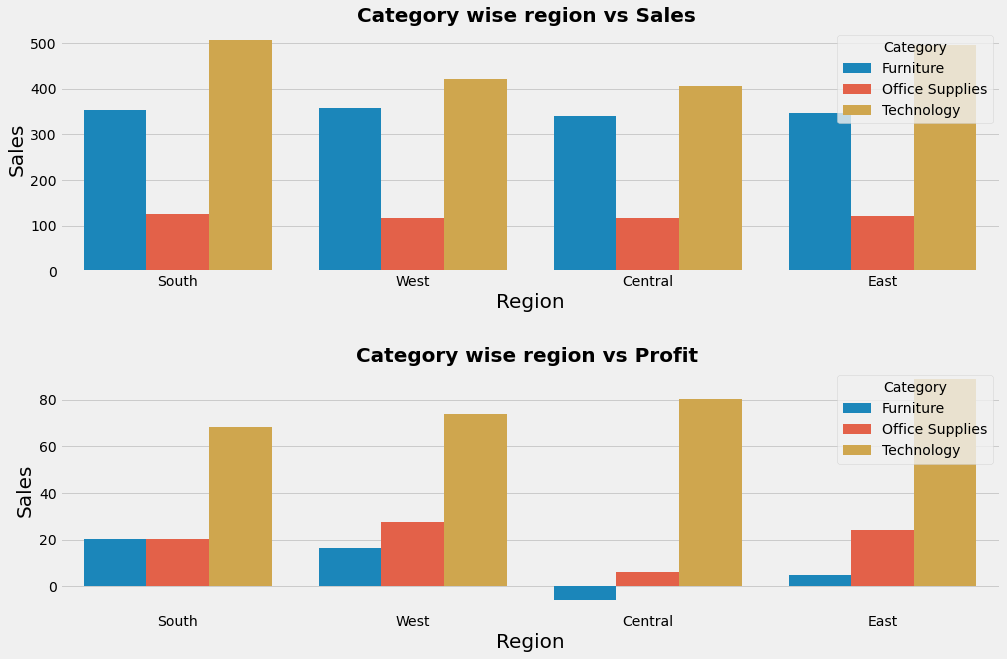

In [3]:
plt.figure(figsize=(15,10))                                                 # Set Figure size 
plt.subplots_adjust(hspace=0.4)                                             # Spacing between 2 figures 
plt.subplot(2,1,1)                                                          # for subplots
sb.barplot(df.Region,df.Sales,hue=df.Category,ci=None,)
plt.title("Category wise region vs Sales ",fontsize=20,fontweight="bold")
plt.xlabel("Region",fontsize=20)
plt.ylabel("Sales",fontsize=20)

plt.subplot(2,1,2)
sb.barplot(df.Region,df.Profit,hue=df.Category,ci=None,)
plt.title("Category wise region vs Profit ",fontsize=20,fontweight="bold")
plt.xlabel("Region",fontsize=20)
plt.ylabel("Sales",fontsize=20)
plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta >* The Maximum Sales in Furniture Category in South Region and The Minimum Sales in Office Supplies in central region
### <font color=magneta >* In East Region there is maximum Profit In Technology  And In central region The Profit goes in negative In Furniture

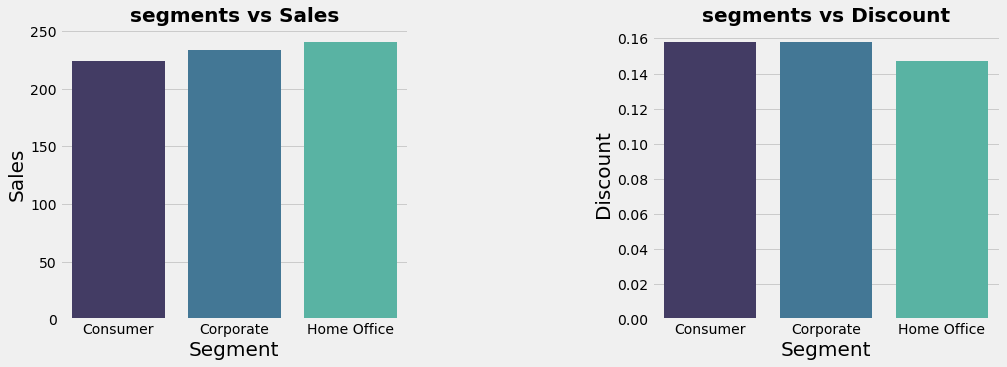

In [4]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.7)
plt.subplot(1,2,1)
sb.barplot(df.Segment,df.Sales,ci=None,palette="mako")
plt.title("segments vs Sales",fontsize=20,fontweight="bold")
plt.xlabel("Segment",fontsize=20)
plt.ylabel("Sales",fontsize=20)

plt.subplot(1,2,2)
sb.barplot(df.Segment,df.Discount,ci=None,palette="mako")
plt.title("segments vs Discount",fontsize=20,fontweight="bold")
plt.xlabel("Segment",fontsize=20)
plt.ylabel("Discount",fontsize=20)
plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta >* The Maximum Sales is from Home office and The Minimum Sales is from Consumer Segments.
### <font color=magneta >* The Maximum Discount is from Consumer and The Minimum Discount is from Home Office Segments.

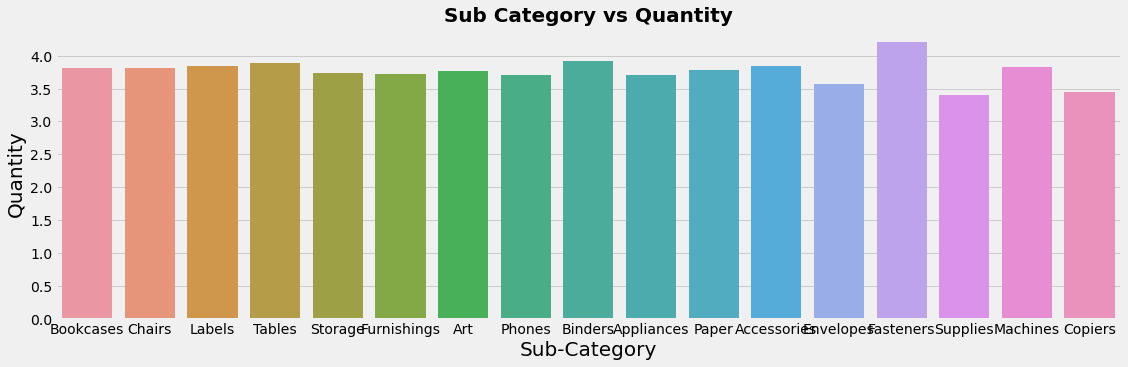

In [5]:
plt.figure(figsize=(17,5))
sb.barplot(df["Sub-Category"],df["Quantity"],ci=None)
plt.title("Sub Category vs Quantity",fontsize=20,fontweight="bold")
plt.xlabel("Sub-Category",fontsize=20)
plt.ylabel("Quantity",fontsize=20)
plt.show()

### The Quantity of fasteners is more and the Quantity of Supplies is less

In [6]:
df.shape                                                # Check The Structure of the Dataset

(9994, 21)

In [7]:
df.isnull().sum()                                       # Check The Null values 

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.dtypes                                               # Check the Datatypes 

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df.Category.value_counts()                             # Check the value Counts of the Category

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
df["Order Date"].value_counts()

2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2016-02-25     1
2016-10-25     1
2014-02-21     1
2016-10-18     1
2014-01-21     1
Name: Order Date, Length: 1237, dtype: int64

In [11]:
Office_Supplies=df[df.Category=="Office Supplies"]      # Filter the data Which Have category = Office Supplies 
Office_Supplies.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164


In [12]:
Office_Sales=pd.DataFrame(Office_Supplies.groupby(by=["Order Date"])["Sales"].sum())       # Group by Order Date With aggrigation sum 
Office_Sales

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430
...,...
2017-12-26,814.594
2017-12-27,13.248
2017-12-28,1091.244


In [13]:
furniture=df[df.Category=="Furniture"]                   # Filter the data Which Have category = Furniture
furniture.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [67]:
furniture_sales=pd.DataFrame(furniture.groupby(by=["Order Date"])["Sales"].sum())   # Group by Order Date With aggrigation sum 
furniture_sales

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [15]:
Technology=df[df.Category=="Technology"]                # Filter the data Which Have category = Technology
Technology.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568


In [16]:
technology_sales=pd.DataFrame(Technology.groupby(by=["Order Date"])["Sales"].sum())  # Group by Order Date With aggrigation sum 
technology_sales

,Sales
Order Date,
2014-01-06,1147.940
2014-01-09,31.200
2014-01-13,646.740
2014-01-15,149.950
2014-01-16,124.200
...,...
2017-12-25,401.208
2017-12-27,164.388
2017-12-28,14.850


In [17]:
resample1=Office_Sales.Sales.resample("M")                # Resample the Office Supplies Data In Months Wise 
mon_mean1=resample1.mean()

resample2=furniture_sales.Sales.resample("M")             # Resample the Furniture Data In Months Wise 
mon_mean2=resample2.mean()

resample3=technology_sales.Sales.resample("M")            # Resample the Technology Data In Months Wise 
mon_mean3=resample3.mean()


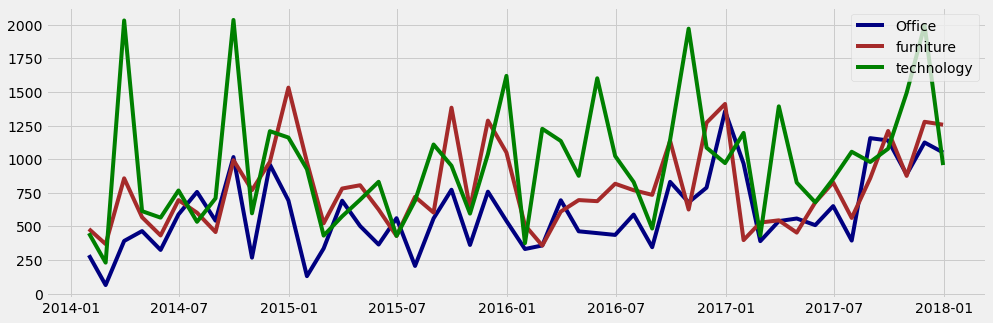

In [18]:
plt.figure(figsize=(15,5))
plt.plot(mon_mean1,c='Navy',label="Office")
plt.plot(mon_mean2,c='Brown',label="furniture")
plt.plot(mon_mean3,c='green',label="technology")
plt.legend()
plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta >* Here we Visaualze the Different trend of Different Category such as office supplies, furniture, technology
### <font color=magneta >* Here We can see that there is Positive trend occur of all three different types of categories

## Decomposition of data

In [19]:
resample1=furniture_sales.Sales.resample("W")           # Here we resample our furniture data in week wise 
fur=resample1.mean()
fur=pd.DataFrame(fur)
fur

,Sales
Order Date,
2014-01-12,678.107000
2014-01-19,312.618250
2014-01-26,551.986000
2014-02-02,311.833000
2014-02-09,14.560000
...,...
2017-12-03,2286.881714
2017-12-10,1465.734000
2017-12-17,773.303167


In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose              #seasonal Decompose 

decomp=seasonal_decompose(fur,period=52)

In [21]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

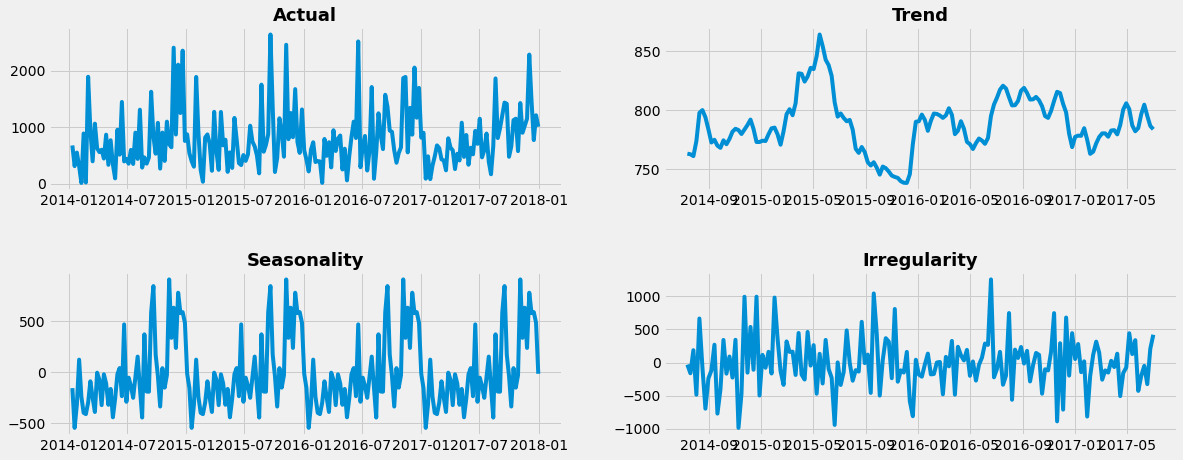

In [22]:
plt.figure(figsize=(18,7))          # Creating subplots of Actual trends seasonal and residual
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.plot(fur)
plt.title("Actual",fontsize=18,fontweight="bold")

plt.subplot(2,2,2)
plt.plot(trend)
plt.title("Trend",fontsize=18,fontweight="bold")

plt.subplot(2,2,3)
plt.plot(seasonal)
plt.title("Seasonality",fontsize=18,fontweight="bold")

plt.subplot(2,2,4)
plt.plot(residual)
plt.title("Irregularity",fontsize=18,fontweight="bold")
plt.show()

### <font color=dark><u>INTERPRETATION :
    
### <font color=magneta > 1. The First graph shows the actual data of Sales.
### <font color=magneta > 2. The Second Graph shows the Trend of the sales so there is positive Trend . 
### <font color=magneta > 3. The Third Graph shows the Seasonality of the sales so there is same pattern again and again so there is seasonality also. 
### <font color=magneta > 4. The Fourth Graph Shows the Irregularity of the sales. 

## Spliting the DataSet Into Train And Test 

In [23]:
train_len=int(0.8*len(fur))
train=fur.iloc[:train_len]                              # Spliting The Data With the help of iloc Function 
test=fur.iloc[train_len:]

In [24]:
len(train),len(test)

(166, 42)

## Check data for Stationary

In [25]:
from statsmodels.tsa.stattools import adfuller                   # Import adfuller Library For Checking Stationary

In [26]:
def checkstationary(data):
    pvalue=adfuller(data)[1]
    if pvalue<0.05:
        result="Data is Stationary, Go for Model building"
    else:
        result="Data is not in Stationary, make the Data Stationary"
    return(result)

In [27]:
checkstationary(fur.Sales)

'Data is Stationary, Go for Model building'

## Plot ACF and PACF

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf     # Import ACF And PACF Plot

<Figure size 1440x720 with 0 Axes>

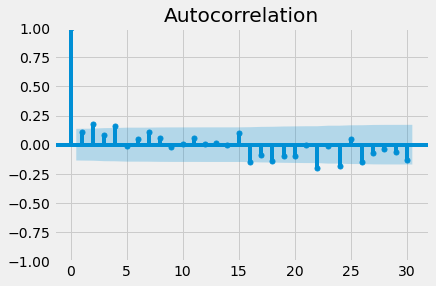

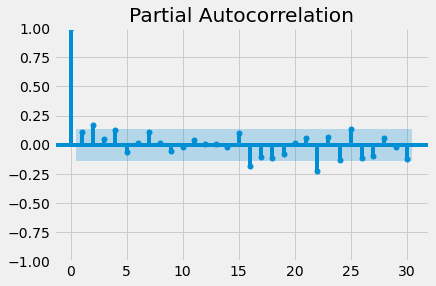

In [29]:
plt.figure(figsize=(20,10))
plot_acf(fur.Sales,lags=30)                                      # Plot ACF and PACF to find the value of P and Q
plot_pacf(fur.Sales,lags=30)  
plt.show()                                                       # correlogram 

## <u>SARIMA Model

In [30]:
p=3
q=4

In [31]:
li=[]                                                  # We Create a list of all combintions 
for i in range(3):
    for j in range(4):
        li.append((i,0,j))                             #We append the i and j value in list 
li

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3)]

In [32]:
import statsmodels.api as sm
model=[]                                                
for i in range(3):
    for j in range(4): 
        m=sm.tsa.statespace.SARIMAX(train.Sales,order=(i,0,j),seasonal_order=(i,0,j,52)).fit()
        model.append(m)                                     # Append all the models into the list 
model

C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
from sklearn.metrics import mean_squared_error           
MSE=[]
RMSE=[]
                                                        #we find the value of MSE RMSE of all possible models  
for i in model:
    forecast=i.fittedvalues
    mse=mean_squared_error(train,forecast)
    rmse=mean_squared_error(train,forecast,squared=False)
    MSE.append(mse)
    RMSE.append(rmse)

In [34]:
Sarimaa=pd.DataFrame(index=li)
Sarimaa["MSE"]=MSE
Sarimaa["RMSE"]=RMSE
Sarimaa

,MSE,RMSE
"(0, 0, 0)",875815.487942,935.850142
"(0, 0, 1)",534140.711389,730.849308
"(0, 0, 2)",444733.397064,666.883346
"(0, 0, 3)",409309.536359,639.773035
"(1, 0, 0)",437181.387677,661.196936
"(1, 0, 1)",282419.799316,531.431839
"(1, 0, 2)",285472.718703,534.296471
"(1, 0, 3)",278971.930415,528.177934
"(2, 0, 0)",340774.970069,583.759343
"(2, 0, 1)",283276.839059,532.237578


In [35]:
print("minimum MSE = ",Sarimaa["MSE"].idxmin())               # Finding the Index position where MSE value is minimum
print("minimum RMSE = ",Sarimaa["RMSE"].idxmin())             # Finding the Index position where RMSE value is minimum

minimum MSE =  (2, 0, 3)
minimum RMSE =  (2, 0, 3)


In [36]:
p=2; d=0; q=3                                           # Here we take best model based onauto Arima Recommendation                         
Sarima_model = sm.tsa.statespace.SARIMAX(train.Sales,order=(p,d,q),seasonal_order=(p,d,q,52)).fit()


C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
forecastm2 = Sarima_model.fittedvalues                                    # Fitted the data
forecastm2

Order Date
2014-01-12      0.000000
2014-01-19    402.850006
2014-01-26    394.632745
2014-02-02    383.535075
2014-02-09    421.944143
                 ...    
2017-02-12    665.323164
2017-02-19    695.474219
2017-02-26    706.625414
2017-03-05    837.683024
2017-03-12    682.954257
Freq: W-SUN, Length: 166, dtype: float64

In [38]:
import statsmodels.api as sm                                 # LJung-Box test

pvalue=sm.stats.acorr_ljungbox(Sarima_model.resid,lags=[20],return_df=True)["lb_pvalue"].values
if pvalue < 0.05:
    print("Bad model")
else:
    print("Good model")

Good model


In [39]:
future_forecast1=pd.DataFrame(Sarima_model.forecast(len(test)))   # Future forcast values 
future_forecast1

,predicted_mean
2017-03-19,782.265101
2017-03-26,670.481440
2017-04-02,813.524522
2017-04-09,733.901889
2017-04-16,768.893287
2017-04-23,807.768291
2017-04-30,653.891031
2017-05-07,757.222506
2017-05-14,616.090463
2017-05-21,680.233447


In [40]:
from matplotlib import style
plt.style.use('fivethirtyeight')

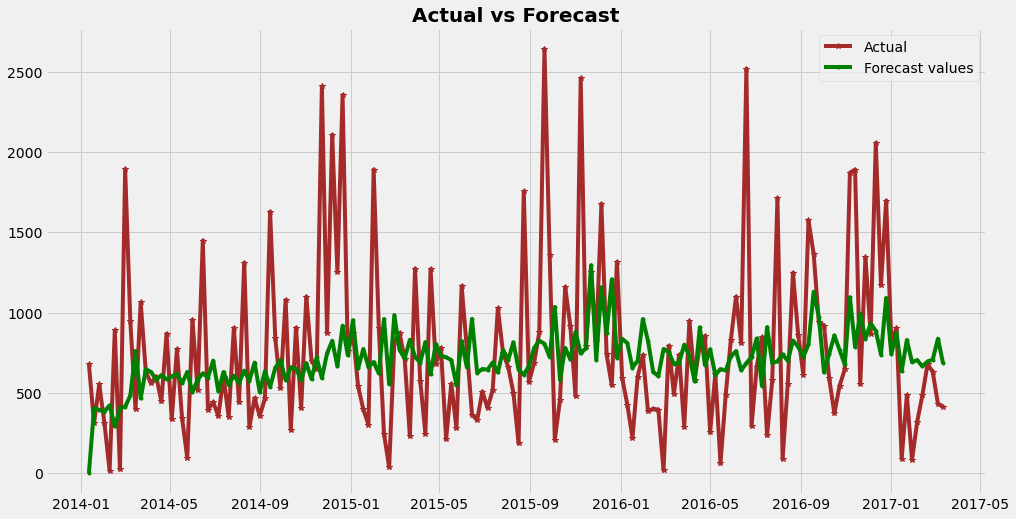

In [41]:
plt.figure(figsize=(15,8))
plt.plot(train.Sales,c="brown",label="Actual",marker="*")
plt.plot(forecastm2,label="Forecast values",marker=".",color='green')
plt.title('Actual vs Forecast',fontsize=20,fontweight="bold")
plt.legend()
plt.show()

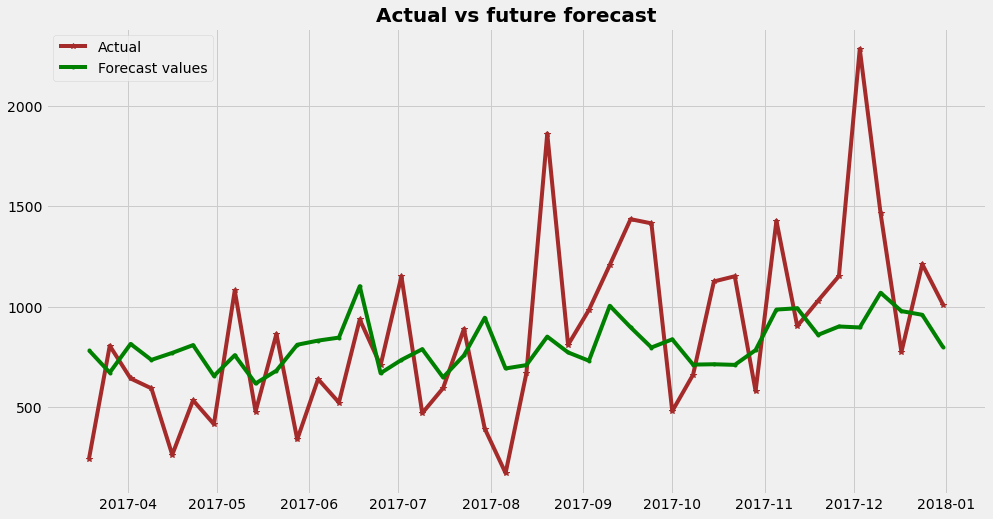

In [42]:
plt.figure(figsize=(15,8))
plt.plot(test.Sales,c="brown",label="Actual",marker="*")
plt.plot(future_forecast1,label="Forecast values",marker=".",color='green')
plt.title('Actual vs future forecast',fontsize=20,fontweight="bold")
plt.legend()
plt.show()

## Error in SARIMA model

In [43]:
mse=mean_squared_error(test.Sales,future_forecast1)
rmse=mean_squared_error(test.Sales,future_forecast1,squared=False)
print(mse)
print(rmse)

168555.70656990493
410.5553635868187


In [44]:
Sarima_aic=Sarima_model.aic
Sarima_bic=Sarima_model.bic
print(Sarima_aic)
print(Sarima_bic)

2575.9891956452675
2610.2210613171897


# <u>Sarimax Model

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX           # Import Sarimax library

In [46]:
new_fur = furniture.groupby(['Order Date'])['Sales','Discount','Profit'].sum()    # Grouping Order Data
new_fur

,Sales,Discount,Profit
Order Date,,,
2014-01-06,2573.8200,0.00,746.4078
2014-01-07,76.7280,0.60,-53.7096
2014-01-10,51.9400,0.00,21.2954
2014-01-11,9.9400,0.00,3.0814
2014-01-13,879.9390,0.15,91.2798
...,...,...,...
2017-12-24,1393.4940,0.50,222.9092
2017-12-25,832.4540,0.80,-7.0763
2017-12-28,551.2568,2.02,-49.6680


In [47]:
new_fur_w= new_fur.resample('W').mean()                  # Resample The data in week wise 

In [48]:
new_fur_w

,Sales,Discount,Profit
Order Date,,,
2014-01-12,678.107000,0.150000,179.268750
2014-01-19,312.618250,0.387500,-63.501100
2014-01-26,551.986000,0.066667,118.542100
2014-02-02,311.833000,0.175000,-6.615200
2014-02-09,14.560000,0.000000,5.532800
...,...,...,...
2017-12-03,2286.881714,0.871429,-25.523386
2017-12-10,1465.734000,0.566667,86.619800
2017-12-17,773.303167,0.808333,-130.020717


## Train Test Split

In [49]:
row = int(len(new_fur_w)*0.8)   
row

train1 = (new_fur_w.iloc[:row])
test1 = (new_fur_w.iloc[row:])

exog_train = train1[['Discount','Profit']]
exog_test = test1[['Discount','Profit']]

In [50]:
print('Train data shape:',train1.shape,'\nTest data shape:',test1.shape)

Train data shape: (166, 3) 
Test data shape: (42, 3)


In [68]:
sarimax_model = SARIMAX(train1.Sales,order=(2,0,3),seasonal_order=(2,0,3,52),exog= exog_train.values).fit()

C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Checking the goodness of the model

In [89]:
pvalue = sm.stats.acorr_ljungbox(sarimax_model.resid,lags=[20],return_df=True)['lb_pvalue'].values 

if pvalue < 0.05:
    print('It is not a good Model')
else :
    print('It is a Good Model')

It is a Good Model


In [90]:
sarimax_forecast = sarimax_model.fittedvalues                        # predictions of the train data
sarimax_forecast

Order Date
2014-01-12    611.698399
2014-01-19    540.030884
2014-01-26    357.680741
2014-02-02    305.006764
2014-02-09    -16.748486
                 ...    
2017-02-12    690.669066
2017-02-19    920.683337
2017-02-26    648.052989
2017-03-05    578.052515
2017-03-12    493.045583
Freq: W-SUN, Length: 166, dtype: float64

In [91]:
sarimax_forecast1 = sarimax_model.forecast(len(test1), exog=exog_test.values)     # Forcast the values 
sarimax_forecast1.head()

2017-03-19    666.296596
2017-03-26    544.980824
2017-04-02    556.429708
2017-04-09    648.959651
2017-04-16    489.788490
Freq: W-SUN, Name: predicted_mean, dtype: float64

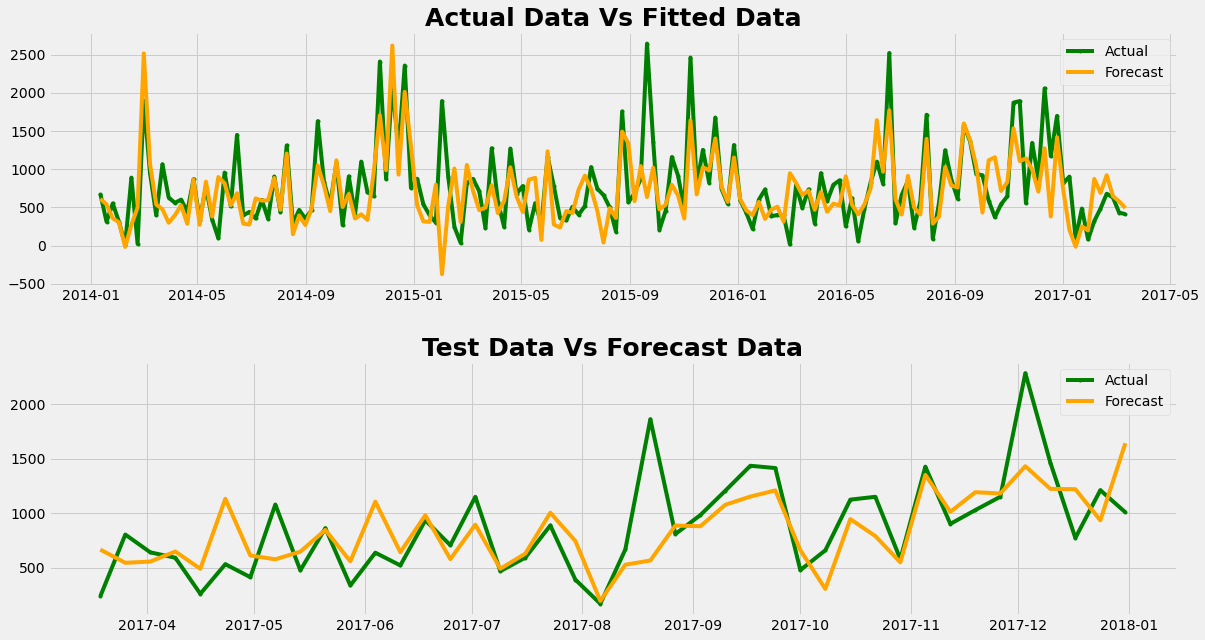

In [92]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,1,1)
plt.title('Actual Data Vs Fitted Data',fontsize=25,fontweight="bold")
plt.plot(train1['Sales'],marker = '.', color = 'Green' , label = 'Actual')
plt.plot(sarimax_forecast ,color = 'orange' , label = 'Forecast' )
plt.legend()

plt.subplot(2,1,2)
plt.title('Test Data Vs Forecast Data',fontsize=25,fontweight="bold")
plt.plot(test1['Sales'],marker = '.', color = 'Green' , label = 'Actual')
plt.plot(sarimax_forecast1,color = 'orange' , label = 'Forecast' )
plt.legend()
plt.show()

## Error in SARIMAX model

In [93]:
sarimax_mse = mean_squared_error(test1['Sales'],sarimax_forecast1)
sarimax_rmse = mean_squared_error(test1['Sales'],sarimax_forecast1,squared=False)

print('MSE :',sarimax_mse)
print('RMSE :',sarimax_rmse)

MSE : 123953.11509240314
RMSE : 352.06975884390175


In [94]:
sarimax_aic = sarimax_model.aic
sarimax_bic = sarimax_model.bic

print('sarimax aic:',sarimax_aic)
print('sarimax bic:',sarimax_bic)

sarimax aic: 2498.2222022667174
sarimax bic: 2538.6780435153523


# <font color=indigo>  <center> <u>Final Results

In [95]:
Final_Result = pd.DataFrame([[mse,sarimax_mse],[rmse,sarimax_rmse],[Sarima_aic,sarimax_aic],[Sarima_bic,sarimax_bic]],
                            columns=['SARIMA model','SARIMAX model'],index=['MSE','RMSE','AIC','BIC'])

In [96]:
Final_Result

,SARIMA model,SARIMAX model
MSE,168555.706570,123953.115092
RMSE,410.555364,352.069759
AIC,2575.989196,2498.222202
BIC,2610.221061,2538.678044


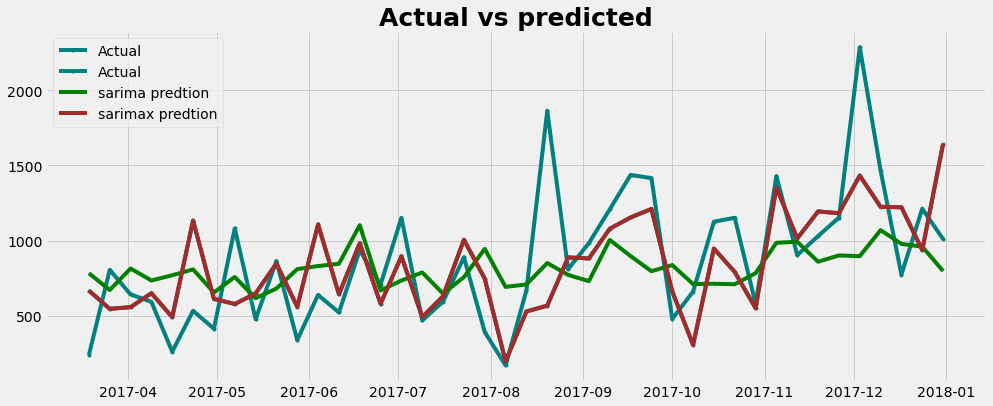

In [104]:
plt.figure(figsize=(15,6))


plt.title('Actual vs predicted',fontsize=25,fontweight="bold")
plt.plot(test,marker = '.', color = 'teal' , label = 'Actual')
plt.plot(future_forecast1 ,color = 'green' , label = 'sarima predtion' )
plt.plot(sarimax_forecast1 ,color = 'brown' , label = 'sarimax predtion' )
plt.legend()
plt.show()

## Predict the Future forecast Sales for Furniture of Upcomming 50 Weeks

In [82]:
exog_new_fur_w=new_fur_w[['Discount','Profit']]

In [83]:
sarimax_model1 = SARIMAX(new_fur_w.Sales,order=(2,0,3),seasonal_order=(2,0,3,52),exog= exog_new_fur_w.values).fit()

C:\Users\AMIT YADAV\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
sarimax_forecast11 = sarimax_model1.forecast(50, exog=exog_new_fur_w.values[:50])     # Forcast the values 

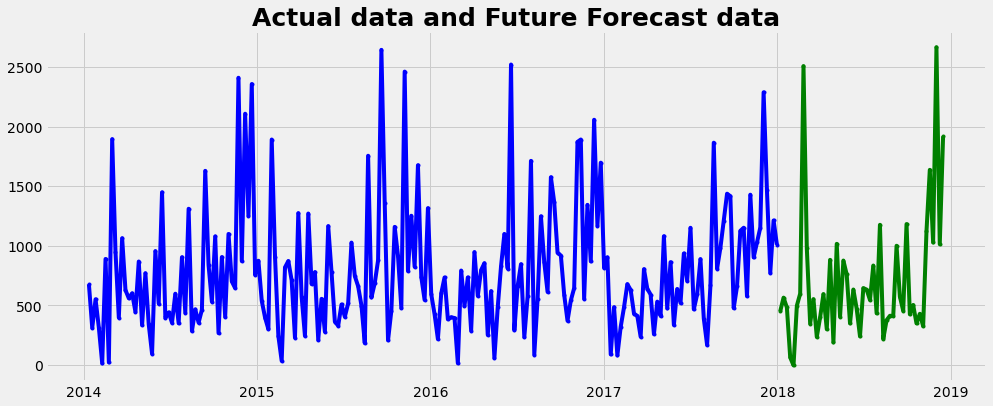

In [101]:
plt.figure(figsize=(15,6))
plt.title('Actual data and Future Forecast data',fontsize=25,fontweight="bold")
plt.plot(new_fur_w['Sales'],marker = '.', color = 'blue' , label = 'Actual')
plt.plot(sarimax_forecast11,marker = '.', color = 'green' , label = 'Actual')
plt.show()

In [86]:
sarimax_forecast1

2018-01-07     451.388378
2018-01-14     565.708924
2018-01-21     483.252549
2018-01-28      64.550629
2018-02-04      -2.171702
2018-02-11     497.976056
2018-02-18     599.459807
2018-02-25    2505.977510
2018-03-04     979.563906
2018-03-11     348.000250
2018-03-18     552.557187
2018-03-25     236.312881
2018-04-01     400.284665
2018-04-08     595.135724
2018-04-15     301.336187
2018-04-22     882.347156
2018-04-29     190.524707
2018-05-06    1016.578227
2018-05-13     406.112277
2018-05-20     876.501563
2018-05-27     759.865552
2018-06-03     350.084943
2018-06-10     633.714389
2018-06-17     472.418658
2018-06-24     241.319278
2018-07-01     645.488273
2018-07-08     633.250827
2018-07-15     546.214438
2018-07-22     834.743128
2018-07-29     434.402165
2018-08-05    1176.012424
2018-08-12     220.197135
2018-08-19     376.629452
2018-08-26     413.616161
2018-09-02     411.961691
2018-09-09    1000.430482
2018-09-16     574.129598
2018-09-23     456.375388
2018-09-30  

### <font color=dark><u>INTERPRETATION :
    
### <font color=green > 1. Blue line shows the Actual values.
### <font color=green > 2. Green line shows the Sarima Forecast value But It is also not gives the Accurate Predictions.
### <font color=green > 3. rown line shows the Sarimax Forecast values But It gives us a accurate Result with low minimum MSE RMSE values.

### <font color=dark><u>CONCLUSION :
    
### <font color=Navy > SARIMAX model is the best model for future forecast because it gives less error values MSE, RMSE, AIC, BIC This model helps us to predict the future values of sales and also gives the future trend of the sales 

In [70]:
furniture.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [71]:
Disc=np.random.randint(1,4000,30)
prof=np.random.randint(-1862,1013,30)
data=pd.DataFrame()
data["Disc"]=np.random.randint(1,4000,30)
data["prof"]=np.random.randint(-1862,1013,30)
data

,Disc,prof
0,1478,74
1,429,2
2,813,229
3,883,241
4,3529,-1170
5,2973,-658
6,1952,-294
7,1145,95
8,1778,-634
9,1242,-120
